Machine Learning assignment 1 - 
Shadi Sefidgar 400222046

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import statsmodels.api as sm
from matplotlib.patches import Circle
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from scipy.stats import f_oneway


# First dataset: Real estate price prediction

# Data Cleaning and Exploratoin

In [2]:
price = pd.read_csv('Real estate.csv')

Explore and clean the dataset. Explain your steps and reasons behind your actions (such as choosing a specific imputation technique).

In [3]:
price.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [7]:
price.shape

(414, 8)

 the data has 8 columns and 414 rows

In [4]:
null_counts = price.isnull().sum()

print("Null value counts of each column:")
print(null_counts)

Null value counts of each column:
No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


the data has no null values

In [12]:
price = price.rename(columns={
    "No":"ID",
    "X1 transaction date":"trans_date",
    "X2 house age":"house_age",
    "X3 distance to the nearest MRT station":"distance_to_MRT_station",
    "X4 number of convenience stores": "number_of_conv_stores",
    "X5 latitude":"latitude",
    "X6 longitude": "longitude",
    "Y house price of unit area": "house_price"
})

price.columns

Index(['ID', 'trans_date', 'house_age', 'distance_to_MRT_station',
       'number_of_conv_stores', 'latitude', 'longitude', 'house_price'],
      dtype='object')

i changed the name of the features for more conviniece

In [18]:
duplicate_rows = price[price.duplicated()]

print("Duplicate rows:")
print(duplicate_rows)

Duplicate rows:
Empty DataFrame
Columns: [trans_date, house_age, distance_to_MRT_station, number_of_conv_stores, latitude, longitude, house_price]
Index: []


the data has no duplicate rows

In [17]:
price = price.drop('ID', axis=1)

KeyError: "['ID'] not found in axis"

the column ID was dropped due to its uselessness

In [19]:
price.head()

,trans_date,house_age,distance_to_MRT_station,number_of_conv_stores,latitude,longitude,house_price
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


# Visualization

Visualize your data to gain better insights. Explain your findings. 

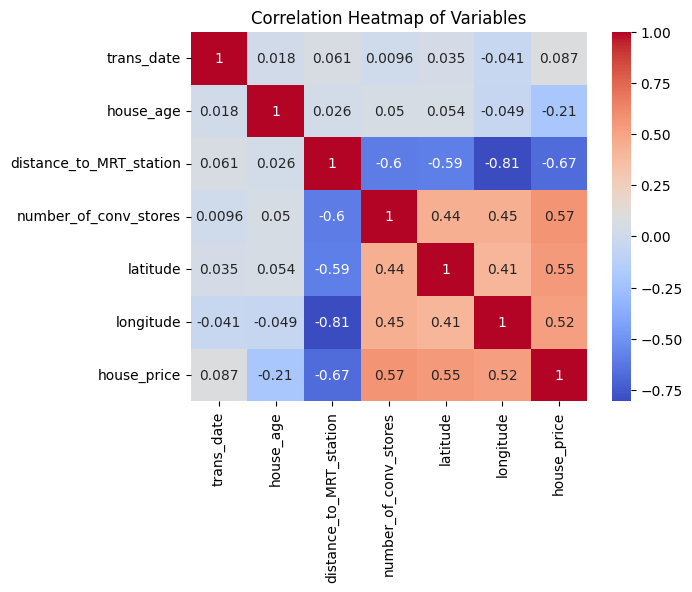

In [20]:
correlation_matrix = price.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Variables")
plt.show()

this is the heatmap which shows the correlation between different features as you can see in the down right corner the target has relatively 
a high correlation with number of convinient stores, latitude and longitude.
And obviously there also is a correlation between latitude and longitude.



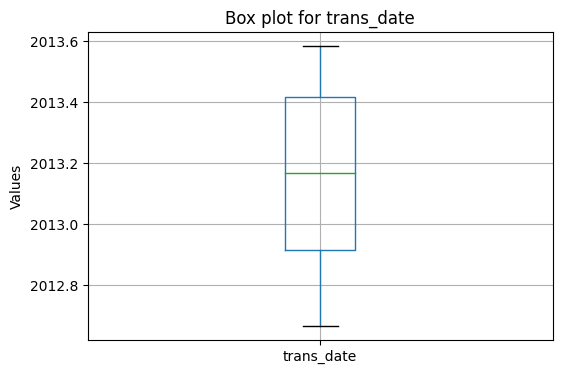

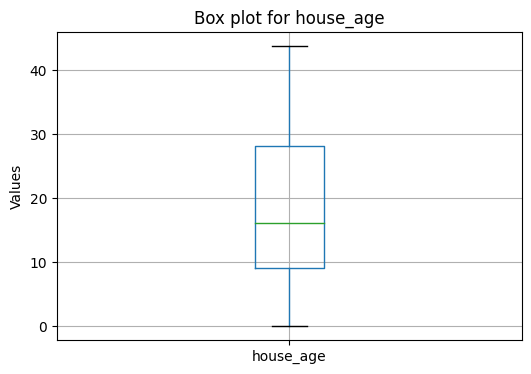

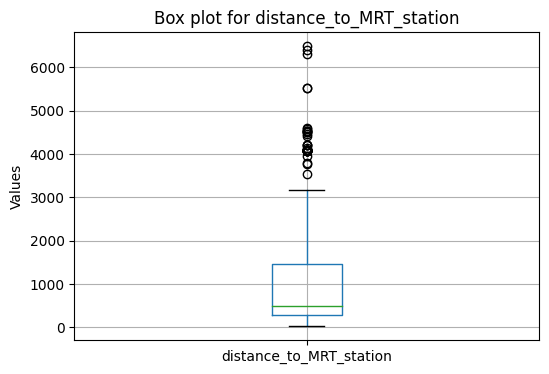

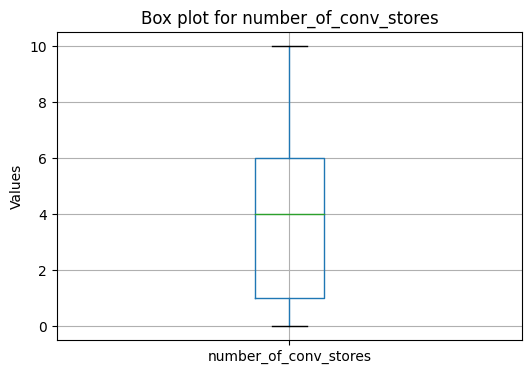

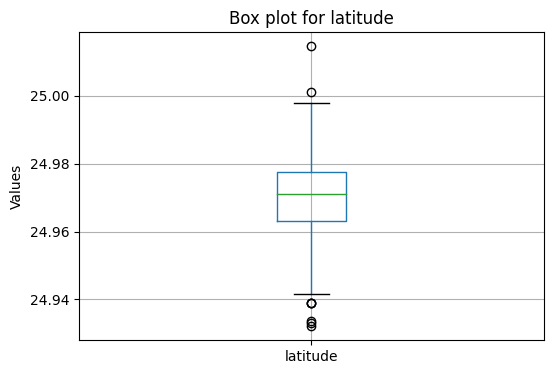

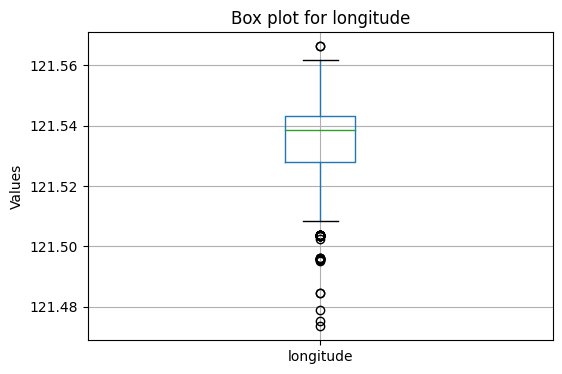

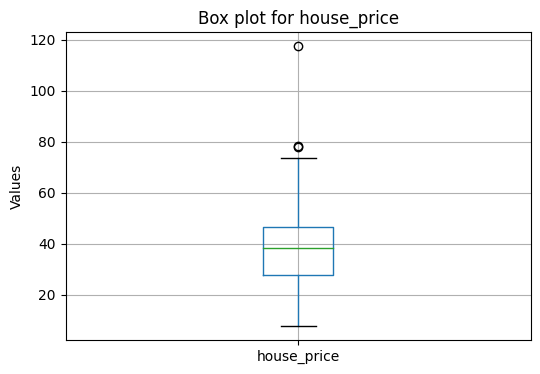

In [26]:
for column in price.columns:
    plt.figure(figsize=(6, 4))  
    price.boxplot(column=[column])
    plt.title('Box plot for {}'.format(column))
    plt.ylabel('Values')
    plt.show()

this one shows the box plot of each and every feature in the data set.
The box plot gives valuable information about distribution of the data.
It also is one of the ways to figure out If the data has any outliers or not.
As you can see in the figure features distance to MRT station, latitude and longitude have some outliers.


# Tests

Test if the average price per unit area of houses above the median age is significantly different from those below the median age. Use p-value method.

In [29]:
#i
median_age = price['house_age'].median()
above_median_age = price[price['house_age'] > median_age]['house_price']
below_median_age = price[price['house_age'] <= median_age]['house_price']
t_statistic, p_value = stats.ttest_ind(above_median_age, below_median_age)
alpha = 0.05
print(p_value)
if p_value < alpha:
    print("The average price per unit area of houses above the median age is significantly different from those below the median age.")
else:
    print("There is no significant difference in the average price per unit area of houses above the median age and those below the median age.")


9.222058819283308e-07
The average price per unit area of houses above the median age is significantly different from those below the median age.


Investigate if the average price per unit area significantly differs by the number of convenience stores (categorized by "X4 number of convenience stores").

In [32]:
#ii
grouped_data = price.groupby('number_of_conv_stores')['house_price']
f_statistic, p_value = stats.f_oneway(*[group for _, group in grouped_data])
alpha = 0.05
print(p_value)
if p_value < alpha:
    print("The average price per unit area significantly differs by the number of convenience stores (p-value = {:.4f}).".format(p_value))
else:
    print("There is no significant difference in the average price per unit area by the number of convenience stores (p-value = {:.4f}).".format(p_value))

1.1781067247237561e-36
The average price per unit area significantly differs by the number of convenience stores (p-value = 0.0000).


Choose two categorical variables and test if there's a significant association between them. (You may need to categorize some of the numerical variables.)

In [109]:
#iii
price['trans_date'] = pd.Categorical(price['trans_date'])
price['number_of_conv_stores'] = pd.Categorical(price['number_of_conv_stores'])
contingency_table = pd.crosstab(price['trans_date'], price['number_of_conv_stores'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
alpha = 0.05
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
if p_value < alpha:
    print("There is a significant association between 'trans_date' and 'number_of_conv_stores'.")
else:
    print("There is no significant association between 'trans_date' and 'number_of_conv_stores'.")

Chi-square statistic: 3.631874628794314
P-value: 0.9624298084019165
There is no significant association between 'trans_date' and 'number_of_conv_stores'.


here i turned transaction date and number of convininet stores into categorical variables and profomed the test

# Regression 

Calculate the correlation between each variable and the target variable ("Y house price of unit area") to find which variable has the highest influence on the target.

In [33]:
correlation = price.corr()['house_price']
print("Correlation with the target variable (house_price):")
print(correlation)

Correlation with the target variable (house_price):
trans_date                 0.087491
house_age                 -0.210567
distance_to_MRT_station   -0.673613
number_of_conv_stores      0.571005
latitude                   0.546307
longitude                  0.523287
house_price                1.000000
Name: house_price, dtype: float64


Use scikit learn to test-train split train simple linear regression model and extract the weights to confirm your findings from the last question.

In [37]:
X = price.drop(columns=['house_price']) 
y = price['house_price'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
coefficients = model.coef_
print("Coefficients (Weights):")
print(coefficients)

Coefficients (Weights):
[ 5.44074186e+00 -2.70791490e-01 -4.75863892e-03  1.09142527e+00
  2.29043054e+02 -2.94925908e+01]


In [40]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE): {:.4f}".format(mse))
print("R-squared: {:.4f}".format(r2))

Mean Squared Error (MSE): 53.5056
R-squared: 0.6811


and here are the regression moodel results

# Second dataset : Life Expectancy (WHO)

In [49]:
df = pd.read_csv('Life Expectancy Data.csv')

# Data Cleaning and Exploratoin

In [50]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [52]:
df.shape

(2938, 22)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [54]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [55]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [56]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

as you can see the data has a lot of null values

In [58]:
df.duplicated().sum()

0

In [59]:
df.nunique()

Country                             193
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
 BMI                                608
under-five deaths                   252
Polio                                73
Total expenditure                   818
Diphtheria                           81
 HIV/AIDS                           200
GDP                                2490
Population                         2278
 thinness  1-19 years               200
 thinness 5-9 years                 207
Income composition of resources     625
Schooling                           173
dtype: int64

here are the number of unique values for each column

In [60]:
col_with_null_values = ['Life expectancy ', 'Adult Mortality', 'Alcohol', 'Hepatitis B', ' BMI ', 'Polio', 'Total expenditure',
       'Diphtheria ', 'GDP', 'Population',' thinness  1-19 years', ' thinness 5-9 years','Income composition of resources', 'Schooling']
for i in col_with_null_values:
    mean = df[i].mean()
    df[i].fillna(value=mean, inplace = True)

here i handeld null values using mean as their replacement

In [111]:
#Removing spaces on data columns' names
df.rename(columns={" BMI ":"BMI","Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles"," BMI ":"BMI","under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV/AIDS"," thinness  1-19 years":"thinness_1to19_years"," thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                   "Total expenditure":"Tot_Exp"},inplace=True)
df.head()

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,...,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
0,0,2015,1.0,65.0,263.0,30.303948,0.01,71.279624,65.0,2419.59224,...,82.550188,8.16,65.0,0.1,584.259210,1.275338e+07,4.839704,4.870317,0.479,10.1
1,0,2014,1.0,59.9,271.0,30.303948,0.01,73.523582,62.0,492.00000,...,58.000000,8.18,62.0,0.1,612.696514,3.275820e+05,4.839704,4.870317,0.476,10.0
2,0,2013,1.0,59.9,268.0,30.303948,0.01,73.219243,64.0,430.00000,...,62.000000,8.13,64.0,0.1,631.744976,1.275338e+07,4.839704,4.870317,0.470,9.9
3,0,2012,1.0,59.5,272.0,30.303948,0.01,78.184215,67.0,2419.59224,...,67.000000,8.52,67.0,0.1,669.959000,3.696958e+06,4.839704,4.870317,0.463,9.8
4,0,2011,1.0,59.2,275.0,30.303948,0.01,7.097109,68.0,2419.59224,...,68.000000,7.87,68.0,0.1,63.537231,2.978599e+06,4.839704,4.870317,0.454,9.5


the name of the columns in the data had space in them so i removed it for more convinience

In [63]:
lencoder = LabelEncoder()
df['Country'] = lencoder.fit_transform(df['Country'])
df['Status'] = lencoder.fit_transform(df['Status'])

the country and statuse were categorical varibales. using label encoder i turned them into numerical for passing to the model

In [64]:
df['Year'].unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000], dtype=int64)

In [65]:
df.drop(['percentage expenditure','under-five deaths','thinness 5-9 years','Income composition of resources'],inplace=True,axis=1)

KeyError: "['percentage expenditure', 'under-five deaths', 'thinness 5-9 years', 'Income composition of resources'] not found in axis"

useless columns

In [74]:
cat_columns = []
num_columns =[]

for col in df.columns:
    if df[col].dtype == 'object':
        cat_columns.append(col)
    else:
        num_columns.append(col)

In [75]:
def detect_outliers(data_column):
    """
    Calculates IQR and identifies outliers.

    Args:
        data_column (pd.Series): The data column to analyze.

    Returns:
        list: A list of outliers.
    """

    Q1 = data_column.quantile(0.25)
    Q3 = data_column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data_column[(data_column < lower_bound) | (data_column > upper_bound)]
    return outliers.tolist()

In [76]:
outlier_data = {}
for col in num_columns:
    outliers = detect_outliers(df[col])
    outlier_counts = len(outliers)
    outlier_percentages = (outlier_counts / len(df[col])) * 100 
    outlier_data[col] = {'count': outlier_counts, 'percentage': outlier_percentages}
    
    print(col)
    print("No. of IQR-based outliers:", outlier_counts)
    print("--------------------------------")

Country
No. of IQR-based outliers: 0
--------------------------------
Year
No. of IQR-based outliers: 0
--------------------------------
Status
No. of IQR-based outliers: 512
--------------------------------
Life_Expectancy
No. of IQR-based outliers: 17
--------------------------------
Adult_Mortality
No. of IQR-based outliers: 86
--------------------------------
Infant_Deaths
No. of IQR-based outliers: 315
--------------------------------
Alcohol
No. of IQR-based outliers: 3
--------------------------------
Percentage_Exp
No. of IQR-based outliers: 389
--------------------------------
HepatitisB
No. of IQR-based outliers: 316
--------------------------------
Measles
No. of IQR-based outliers: 542
--------------------------------
BMI
No. of IQR-based outliers: 0
--------------------------------
Under_Five_Deaths
No. of IQR-based outliers: 394
--------------------------------
Polio
No. of IQR-based outliers: 279
--------------------------------
Tot_Exp
No. of IQR-based outliers: 51
----

detect and counting outliers

In [79]:
for col in num_columns:
    outliers = detect_outliers(df[col])
    if outliers:  
        mean_value = df[col].mean()  
        df.loc[df[col].isin(outliers), col] = mean_value  # Replace outliers with mean

and here i handled outliers replacing them with the mean value

# visualization

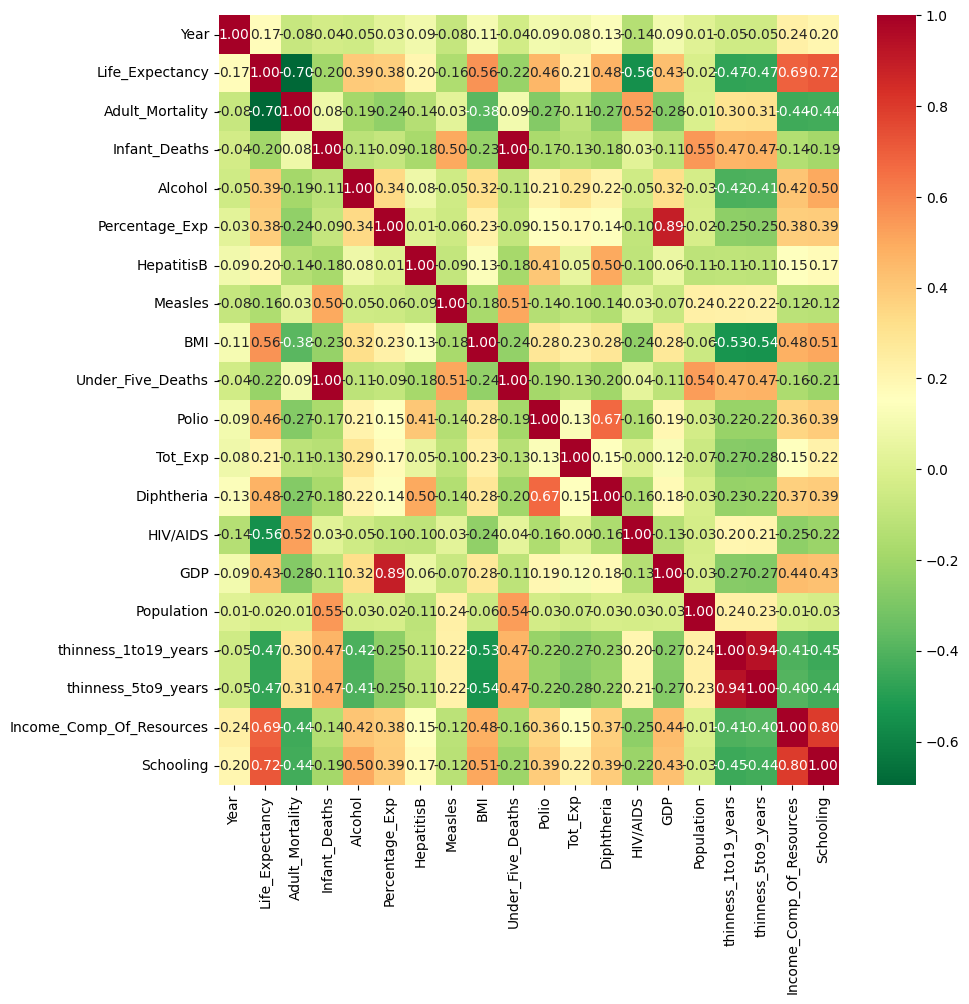

In [69]:
numeric_columns = df.select_dtypes(include=['float64','int64']).columns
numeric_df = df[numeric_columns]
c = numeric_df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(c, cmap='RdYlGn_r', annot=True, fmt=".2f")
plt.show()

heatmap of the data that shows the corrrelation between diffrent featurs.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '2000'),
  Text(1, 0, '2001'),
  Text(2, 0, '2002'),
  Text(3, 0, '2003'),
  Text(4, 0, '2004'),
  Text(5, 0, '2005'),
  Text(6, 0, '2006'),
  Text(7, 0, '2007'),
  Text(8, 0, '2008'),
  Text(9, 0, '2009'),
  Text(10, 0, '2010'),
  Text(11, 0, '2011'),
  Text(12, 0, '2012'),
  Text(13, 0, '2013'),
  Text(14, 0, '2014'),
  Text(15, 0, '2015')])

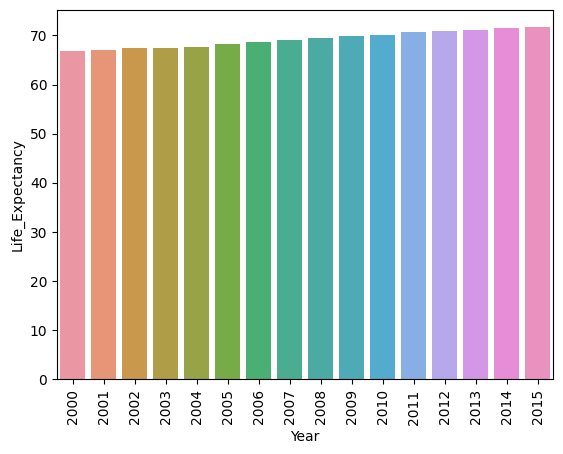

In [70]:
sns.barplot(data=df,y='Life_Expectancy',x='Year',errorbar=None)
plt.xticks(rotation=90)

this plot shows the LE in years from 2000 to 2015

<Axes: xlabel='Status', ylabel='count'>

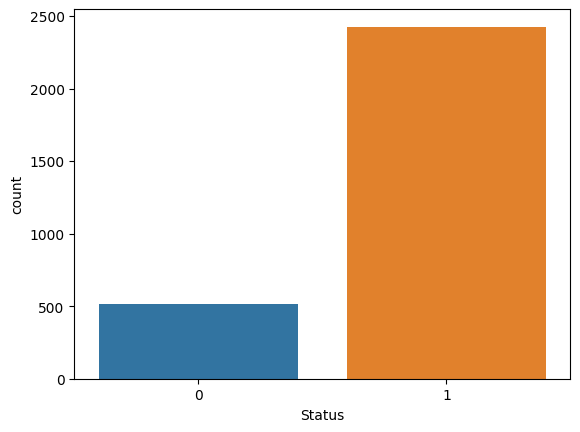

In [71]:
sns.countplot(data=df,x='Status')

and this one shows the count of the two categories in the feature statuse which are developing and developed(0 is develped and 1 is developing)

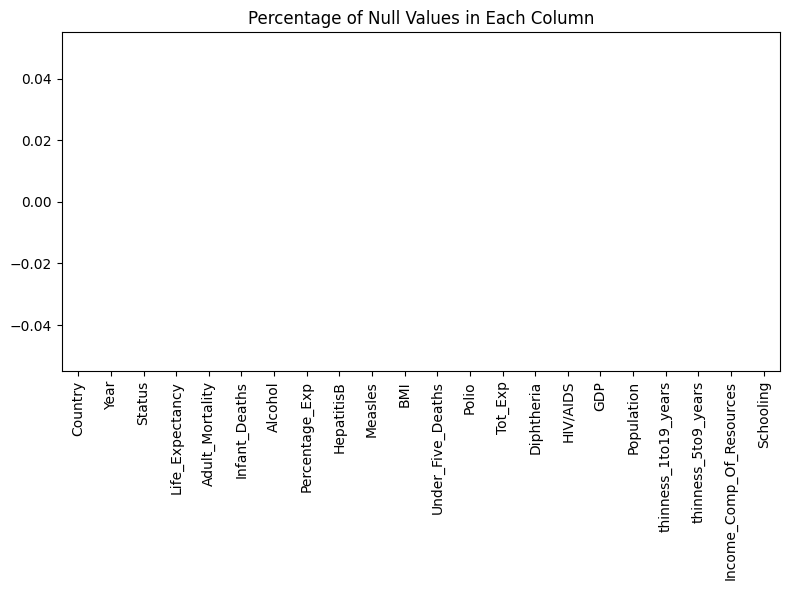

In [73]:
null_percentages = df.isnull().mean(axis=0) * 100
plt.figure(figsize=(8, 6))
null_percentages.plot(kind='bar', color='red')
plt.title('Percentage of Null Values in Each Column')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

this one shows the percentage of null values in each column

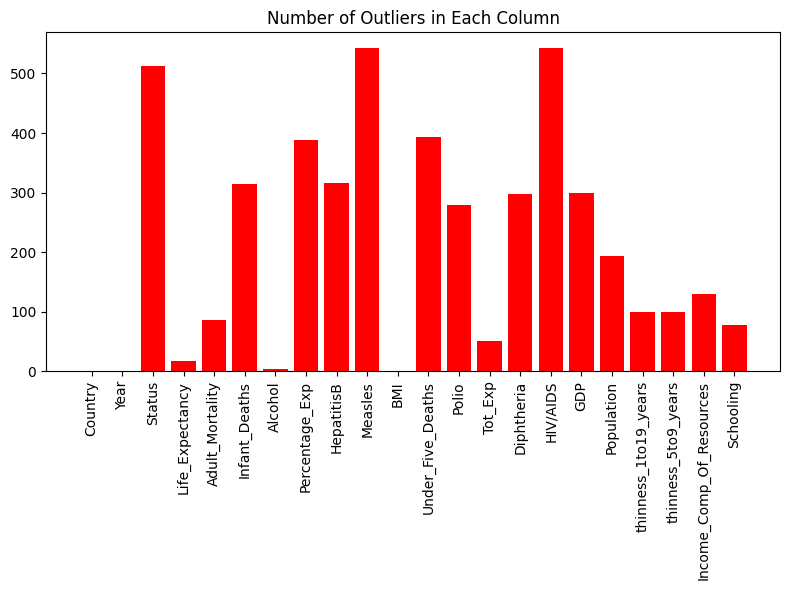

In [77]:
plt.figure(figsize=(8, 6))
plt.bar(outlier_data.keys(), [v['count'] for v in outlier_data.values()], color='red')
plt.title('Number of Outliers in Each Column')
plt.ylabel('')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

the number of outliers in each column which were handled in the previous steps

# Test 

i. Investigate the relationship between Status (Developed vs. Developing) and the prevalence of a disease (for example, "Hepatitis B" vaccination rates).

In [113]:
#i
developed = df[df['Status'] == 0]
developing = df[df['Status'] == 1]
t_statistic, p_value = ttest_ind(developed['HepatitisB'].dropna(), developing['HepatitisB'].dropna(), equal_var=False)
alpha = 0.05
print("Null Hypothesis (H0): There is no significant difference in Hepatitis B vaccination rates between Developed and Developing countries.")
print("Alternative Hypothesis (H1): There is a significant difference in Hepatitis B vaccination rates between Developed and Developing countries.")
print("\nResults:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)
if p_value < alpha:
    print("\nConclusion: Reject the null hypothesis.")
    print("There is a significant difference in Hepatitis B vaccination rates between Developed and Developing countries.")
else:
    print("\nConclusion: Fail to reject the null hypothesis.")
    print("There is no significant difference in Hepatitis B vaccination rates between Developed and Developing countries.")


Null Hypothesis (H0): There is no significant difference in Hepatitis B vaccination rates between Developed and Developing countries.
Alternative Hypothesis (H1): There is a significant difference in Hepatitis B vaccination rates between Developed and Developing countries.

Results:
T-statistic: nan
P-value: nan

Conclusion: Fail to reject the null hypothesis.
There is no significant difference in Hepatitis B vaccination rates between Developed and Developing countries.


ii.	Compare the life expectancy ("Life expectancy") between two groups defined by the "Status" column (Developed vs. Developing countries). 

In [115]:
#ii
developed = df[df['Status'] == '0']
developing = df[df['Status'] == '1']
t_statistic, p_value = ttest_ind(developed['Life_Expectancy'].dropna(), developing['Life_Expectancy'].dropna(), equal_var=False)
alpha = 0.05
print("Null Hypothesis (H0): There is no significant difference in life expectancy between Developed and Developing countries.")
print("Alternative Hypothesis (H1): There is a significant difference in life expectancy between Developed and Developing countries.")
print("\nResults:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)
if p_value < alpha:
    print("\nConclusion: Reject the null hypothesis.")
    print("There is a significant difference in life expectancy between Developed and Developing countries.")
else:
    print("\nConclusion: Fail to reject the null hypothesis.")
    print("There is no significant difference in life expectancy between Developed and Developing countries.")

Null Hypothesis (H0): There is no significant difference in life expectancy between Developed and Developing countries.
Alternative Hypothesis (H1): There is a significant difference in life expectancy between Developed and Developing countries.

Results:
T-statistic: nan
P-value: nan

Conclusion: Fail to reject the null hypothesis.
There is no significant difference in life expectancy between Developed and Developing countries.


iii. Compare the life expectancy ("Life expectancy") across multiple groups defined by the "Year" column.

In [86]:
#iii
year_groups = [group['Life_Expectancy'].dropna() for year, group in df.groupby('Year')]
f_statistic, p_value = f_oneway(*year_groups)
alpha = 0.05
print("Null Hypothesis (H0): There is no significant difference in life expectancy across different years.")
print("Alternative Hypothesis (H1): There is a significant difference in life expectancy across different years.")
print("\nResults:")
print("F-statistic:", f_statistic)
print("P-value:", p_value)
if p_value < alpha:
    print("\nConclusion: Reject the null hypothesis.")
    print("There is a significant difference in life expectancy across different years.")
else:
    print("\nConclusion: Fail to reject the null hypothesis.")
    print("There is no significant difference in life expectancy across different years.")

Null Hypothesis (H0): There is no significant difference in life expectancy across different years.
Alternative Hypothesis (H1): There is a significant difference in life expectancy across different years.

Results:
F-statistic: 5.052322295035589
P-value: 5.698108618067807e-10

Conclusion: Reject the null hypothesis.
There is a significant difference in life expectancy across different years.


iv. Design 2 more hypothesis tests to further explore the dataset.

In [87]:
#iv1
# Investigate the relationship between alcohol consumption ('Alcohol') and life expectancy ('Life_Expectancy').
from scipy.stats import pearsonr
correlation_coef, p_value = pearsonr(df['Alcohol'].dropna(), df['Life_Expectancy'].dropna())
alpha = 0.05
print("Null Hypothesis (H0): There is no significant association between alcohol consumption and life expectancy.")
print("Alternative Hypothesis (H1): There is a significant association between alcohol consumption and life expectancy.")
print("\nResults:")
print("Correlation Coefficient:", correlation_coef)
print("P-value:", p_value)
if p_value < alpha:
    print("\nConclusion: Reject the null hypothesis.")
    print("There is a significant association between alcohol consumption and life expectancy.")
else:
    print("\nConclusion: Fail to reject the null hypothesis.")
    print("There is no significant association between alcohol consumption and life expectancy.")

Null Hypothesis (H0): There is no significant association between alcohol consumption and life expectancy.
Alternative Hypothesis (H1): There is a significant association between alcohol consumption and life expectancy.

Results:
Correlation Coefficient: 0.3959907114894389
P-value: 6.747315469986618e-111

Conclusion: Reject the null hypothesis.
There is a significant association between alcohol consumption and life expectancy.


In [88]:
#iv.2. 
# Compare the BMI ('BMI') across different income levels ('Income_Comp_Of_Resources').
income_groups = [group['BMI'].dropna() for income, group in df.groupby('Income_Comp_Of_Resources')]
f_statistic, p_value = f_oneway(*income_groups)
alpha = 0.05
print("Null Hypothesis (H0): There is no significant difference in BMI across different income levels.")
print("Alternative Hypothesis (H1): There is a significant difference in BMI across different income levels.")
print("\nResults:")
print("F-statistic:", f_statistic)
print("P-value:", p_value)
if p_value < alpha:
    print("\nConclusion: Reject the null hypothesis.")
    print("There is a significant difference in BMI across different income levels.")
else:
    print("\nConclusion: Fail to reject the null hypothesis.")
    print("There is no significant difference in BMI across different income levels.")

Null Hypothesis (H0): There is no significant difference in BMI across different income levels.
Alternative Hypothesis (H1): There is a significant difference in BMI across different income levels.

Results:
F-statistic: 3.390012007174334
P-value: 5.437463313878576e-99

Conclusion: Reject the null hypothesis.
There is a significant difference in BMI across different income levels.


Calculate the correlation between each variable and the target variable ("Life expectancy")

In [90]:
correlation_with_life_expectancy = df.corr()['Life_Expectancy']
print("Correlation with the target variable (Life Expectancy):")
print(correlation_with_life_expectancy)

Correlation with the target variable (Life Expectancy):
Country                    -0.003428
Year                        0.158140
Status                     -0.485645
Life_Expectancy             1.000000
Adult_Mortality            -0.607129
Infant_Deaths              -0.562251
Alcohol                     0.395991
Percentage_Exp              0.474392
HepatitisB                  0.341601
Measles                    -0.316974
BMI                         0.558196
Under_Five_Deaths          -0.584820
Polio                       0.545176
Tot_Exp                     0.242610
Diphtheria                  0.539478
HIV/AIDS                   -0.784951
GDP                         0.410796
Population                 -0.001697
thinness_1to19_years       -0.556697
thinness_5to9_years        -0.551417
Income_Comp_Of_Resources    0.820984
Schooling                   0.719046
Name: Life_Expectancy, dtype: float64


# Model

Test-train split your dataset such that there are no countries in both test and train splits. Now train two linear regression models, one including the column "Country" and another one with this column removed. How did it affect your model performance on test split? Which approach is correct?

In [93]:
X = df.drop(['Life_Expectancy'], axis=1)
y = df['Life_Expectancy']
df_sorted = df.sort_values(by='Country')

unique_countries = df_sorted['Country'].unique()

train_countries, test_countries = train_test_split(unique_countries, test_size=0.2, random_state=42)

train_df = df_sorted[df_sorted['Country'].isin(train_countries)]
test_df = df_sorted[df_sorted['Country'].isin(test_countries)]

X_train = train_df.drop(['Life_Expectancy'], axis=1)
y_train = train_df['Life_Expectancy']
X_test = test_df.drop(['Life_Expectancy'], axis=1)
y_test = test_df['Life_Expectancy']

# Train two linear regression models: one including the 'Country' column and another with this column removed
model_with_country = LinearRegression()
model_with_country.fit(X_train, y_train)

model_without_country = LinearRegression()
model_without_country.fit(X_train.drop(['Country'], axis=1), y_train)
y_pred_with_country = model_with_country.predict(X_test)
y_pred_without_country = model_without_country.predict(X_test.drop(['Country'], axis=1))
mse_with_country = mean_squared_error(y_test, y_pred_with_country)
mse_without_country = mean_squared_error(y_test, y_pred_without_country)
print("Mean Squared Error (with 'Country' column):", mse_with_country)
print("Mean Squared Error (without 'Country' column):", mse_without_country)

Mean Squared Error (with 'Country' column): 16.866022496197623
Mean Squared Error (without 'Country' column): 16.846886674984745


We can see that the difference in MSE between the two approaches is quite small. The MSE values are similar, indicating that including or excluding the 'Country' column from the features has not significantly affected the model performance on the test split.

Now test-train split the dataset randomly and perform the previous steps. How did the results change? Compare these results to part d. Which approach is correct?

In [94]:
X = df.drop(['Life_Expectancy'], axis=1)
y = df['Life_Expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train two linear regression models: one including the 'Country' column and another with this column removed
model_with_country = LinearRegression()
model_with_country.fit(X_train, y_train)

model_without_country = LinearRegression()
model_without_country.fit(X_train.drop(['Country'], axis=1), y_train)
y_pred_with_country = model_with_country.predict(X_test)
y_pred_without_country = model_without_country.predict(X_test.drop(['Country'], axis=1))
mse_with_country = mean_squared_error(y_test, y_pred_with_country)
mse_without_country = mean_squared_error(y_test, y_pred_without_country)
print("Mean Squared Error (with 'Country' column):", mse_with_country)
print("Mean Squared Error (without 'Country' column):", mse_without_country)

Mean Squared Error (with 'Country' column): 13.121701155850204
Mean Squared Error (without 'Country' column): 13.124452461129783


The difference in MSE between the two approaches is very small, indicating that the choice of splitting method (random vs. ensuring no overlap of countries) does not significantly affect the model performance on the test split.

Given that the MSE values are similar between the two approaches, it suggests that both approaches are valid for modeling the relationship between the features and the target variable ('Life Expectancy')
both approaches are reasonable, but the random test-train split may be more practical and convenient in certain situations

Train a simple linear regression model and another one with L1 regularization. Compare the model weights. Explain the results with the correlation values you calculated before.

In [96]:
X = df.drop(['Life_Expectancy'], axis=1)
y = df['Life_Expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_simple = LinearRegression()
model_simple.fit(X_train, y_train)
model_lasso = Lasso(alpha=0.1)  
model_lasso.fit(X_train, y_train)
coefficients_simple = model_simple.coef_
coefficients_lasso = model_lasso.coef_
coefficients_df = pd.DataFrame({'Feature': X.columns, 'Simple Linear Regression': coefficients_simple, 'Lasso Regression': coefficients_lasso})
print(coefficients_df)

                     Feature  Simple Linear Regression  Lasso Regression
0                    Country              8.736288e-04      9.368771e-04
1                       Year              1.403521e-01      1.453748e-01
2                     Status             -1.122144e+01     -0.000000e+00
3            Adult_Mortality             -1.058052e-02     -1.415097e-02
4              Infant_Deaths             -6.452698e-02     -5.995884e-02
5                    Alcohol             -4.028886e-03      1.066869e-01
6             Percentage_Exp              1.886110e-03      3.050664e-03
7                 HepatitisB             -4.911313e-02     -6.873206e-02
8                    Measles             -3.516797e-04     -1.892839e-04
9                        BMI              3.264969e-03      1.417373e-02
10         Under_Five_Deaths              1.455864e-02     -7.954979e-03
11                     Polio              5.237873e-03      3.522110e-02
12                   Tot_Exp              1.840958e

both linear and Lasso regression models agree on the importance of features highly correlated with life expectancy, such as 'HIV/AIDS'. Lasso regression tends to shrink coefficients towards zero for less impactful features like 'Status', potentially due to multicollinearity. Features with low correlation, like 'Country', receive minimal coefficients in both models, indicating limited predictive power. Overall, Lasso regularization aids in feature selection, emphasizing significant predictors while disregarding less informative ones.